In [1]:
import os
import collections
import itertools

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [4]:
from six.moves import urllib

In [5]:
print(np.__version__)
print(pd.__version__)
print(sp.__version__)
print(tf.__version__)

1.14.3
0.23.0
1.1.0
1.12.0


In [6]:
mnist = input_data.read_data_sets("mnist_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

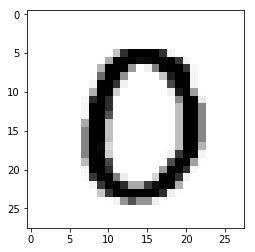

In [8]:
display_digit(mnist.train.images[10])

In [9]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_feature_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_feature_maps = 64
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_feature_maps = conv2_feature_maps

n_fullyconn1 = 64
n_outputs = 10

In [10]:
def build_cnn(features):

    X = tf.reshape(features['images'], shape=[-1, height, width, channels])

    conv1 = tf.layers.conv2d(X, filters=conv1_feature_maps,
                             kernel_size=conv1_kernel_size,
                             strides=conv1_stride, padding=conv1_pad,
                             activation=tf.nn.relu)
    
    conv2 = tf.layers.conv2d(conv1, filters=conv2_feature_maps, 
                             kernel_size=conv2_kernel_size,
                             strides=conv2_stride, padding=conv2_pad,
                             activation=tf.nn.relu)
    
    pool3 = tf.nn.max_pool(conv2,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding="VALID")
    
    
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_feature_maps * 7 * 7])
    
    fullyconn1 = tf.layers.dense(pool3_flat, n_fullyconn1,
                                 activation=tf.nn.relu)
    
    logits = tf.layers.dense(fullyconn1, n_outputs)
    
    return logits    

In [11]:
def cnn_model_fn(features, labels, mode):
    
    logits = build_cnn(features)
    
    predicted_classes = tf.argmax(logits, axis=1)
    
    # Prediction mode    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=predicted_classes)
    
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    
    # Training mode    
    if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)
    
    # Evaluation mode    
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predicted_classes)
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predicted_classes,
        train_op=train_op,
        loss=loss,
        eval_metric_ops={'accuracy': accuracy})

In [12]:
num_steps = 2000
batch_size = 100

In [13]:
model = tf.estimator.Estimator(cnn_model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ADMIN\\AppData\\Local\\Temp\\tmp2ajv8bwe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000170200BF5F8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [15]:
global learning_rate 
learning_rate = 0.001
model.train(input_fn, steps=num_steps)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ADMIN\AppData\Local\Temp\tmp2ajv8bwe\model.ckpt.
INFO:tensorflow:loss = 2.3151236, step = 1
INFO:tensorflow:global_step/sec: 6.13606
INFO:tensorflow:loss = 0.2829638, step = 101 (16.344 sec)
INFO:tensorflow:global_step/sec: 6.27686
INFO:tensorflow:loss = 0.11823466, step = 201 (15.885 sec)
INFO:tensorflow:global_step/sec: 6.3611
INFO:tensorflow:loss = 0.12961575, step = 301 (15.721 sec)
INFO:tensorflow:global_step/sec: 6.38521
INFO:tensorflow:loss = 0.155

In [16]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)


In [17]:
e = model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-22-17:15:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMIN\AppData\Local\Temp\tmp2ajv8bwe\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-22-17:15:08
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9886, global_step = 2000, loss = 0.032178633
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\ADMIN\AppData\Local\Temp\tmp2ajv8bwe\model.ckpt-2000


In [18]:
print("Testing Accuracy:", e['accuracy'])

Testing Accuracy: 0.9886
